# Data Pre-processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [98]:
cm= pd.read_csv('Churn_Modelling.csv')
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cm = cm.set_index("RowNumber")
cm.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##New Section

In [ ]:
cm.drop('CustomerId',axis=1,inplace=True)

In [ ]:
cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y = targets = labels = output_var = cm["Exited"]
X = predictors = input_var = cm.loc[:,cm.columns != "Exited"]

In [ ]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [ ]:
X.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.isnull().any()

Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

##Univariate Analysis

In [ ]:
cm.describe(include = ['float64','int64'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
new_Tenure = pd.to_numeric(cm.Tenure)

In [ ]:
new_Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [ ]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cm.insert(7,'new_Tenure',new_Tenure,True)

In [ ]:
cm.drop('Tenure',axis=1,inplace=True)

In [ ]:
cm.head()

,Surname,CreditScore,Geography,Gender,Age,Balance,new_Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,0.00,2,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,83807.86,1,1,0,1,112542.58,0
3,Onio,502,France,Female,42,159660.80,8,3,1,0,113931.57,1
4,Boni,699,France,Female,39,0.00,1,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,125510.82,2,1,1,1,79084.10,0


In [ ]:
cm['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

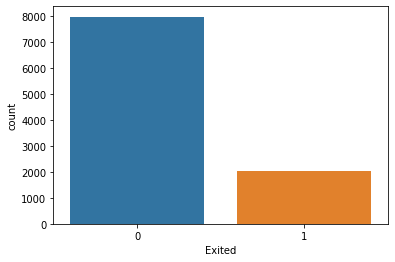

In [ ]:
#Let us see who are exited and who are not as per the column data
sns.countplot(data=cm,x='Exited')

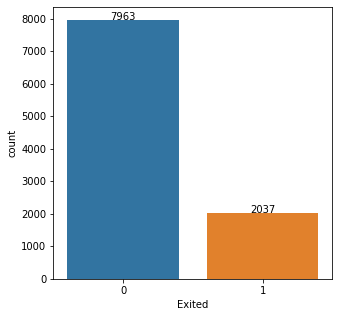

In [ ]:
# Lets Display Count on top of countplot
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Exited', data=cm)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

##Combined Univariate Analysis of All Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

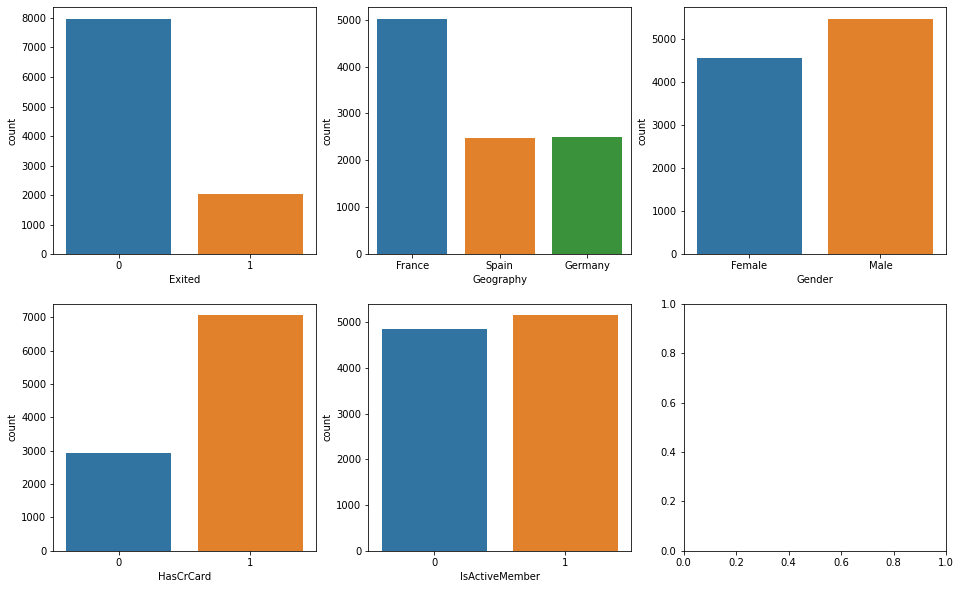

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(16,10))
sns.countplot('Exited',data=cm,ax=axes[0,0])
sns.countplot('Geography',data=cm,ax=axes[0,1])
sns.countplot('Gender',data=cm,ax=axes[0,2])
sns.countplot('HasCrCard',data=cm,ax=axes[1,0])
sns.countplot('IsActiveMember',data=cm,ax=axes[1,1])

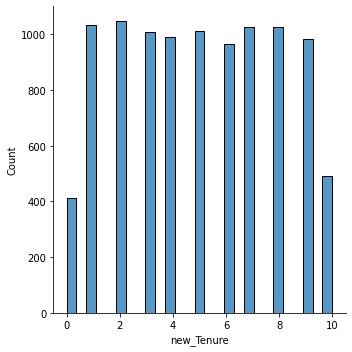

In [ ]:
sns.displot(cm, x="new_Tenure")

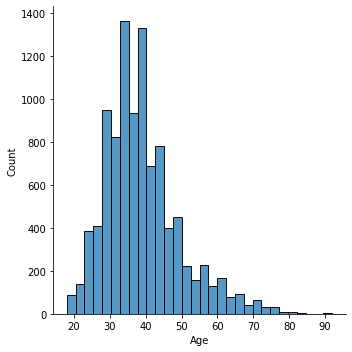

In [ ]:
sns.displot(cm, x="Age",bins=30)

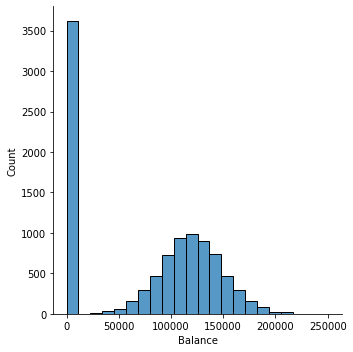

In [ ]:
sns.displot(cm, x="Balance")

# Bivariate Analysis

In [ ]:
cm.head()

,Surname,CreditScore,Geography,Gender,Age,Balance,new_Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,0.00,2,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,83807.86,1,1,0,1,112542.58,0
3,Onio,502,France,Female,42,159660.80,8,3,1,0,113931.57,1
4,Boni,699,France,Female,39,0.00,1,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,125510.82,2,1,1,1,79084.10,0


In [ ]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   new_Tenure       10000 non-null  int64  
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.2+ MB


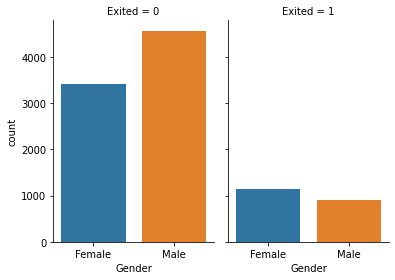

In [ ]:
sns.catplot(x="Gender",col="Exited",data=cm, kind="count",height=4, aspect=.7)

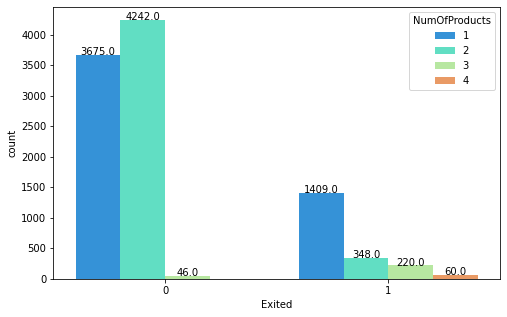

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=cm,x = "Exited",hue="NumOfProducts",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

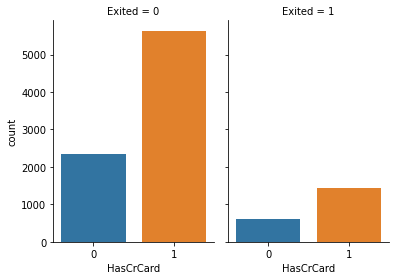

In [ ]:
sns.catplot(x="HasCrCard",col="Exited",data=cm, kind="count",height=4, aspect=.7)

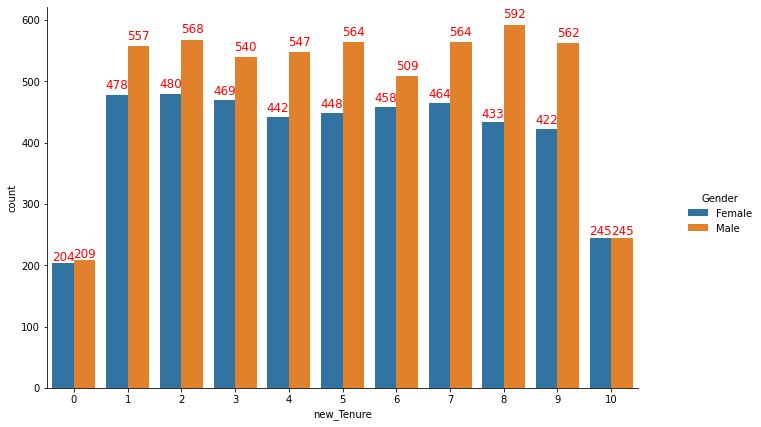

In [ ]:
g = sns.catplot(data=cm,x="new_Tenure",hue = "Gender", kind = "count",height=4,legend=True)
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


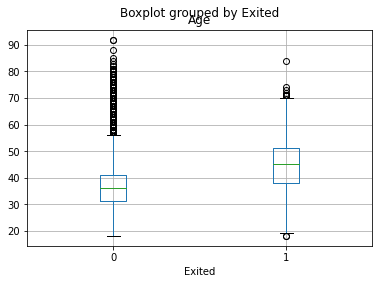

In [ ]:
cm.boxplot(column="Age", by="Exited")

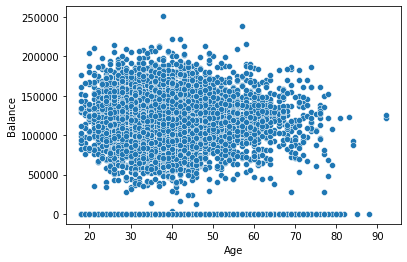

In [ ]:
sns.scatterplot(x=cm["Age"],y=cm["Balance"])

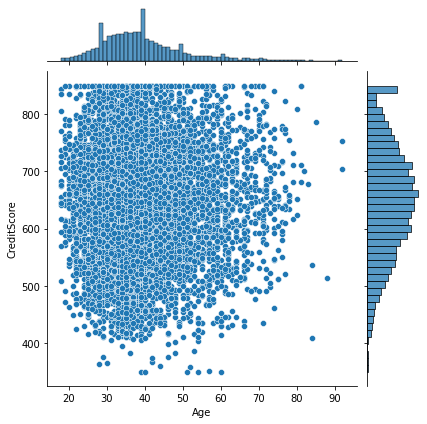

In [ ]:
sns.jointplot(x="Age",y="CreditScore",data=cm)

# MultiVariate Analysis

In [ ]:
cm.head()

,Surname,CreditScore,Geography,Gender,Age,Balance,new_Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,0.00,2,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,83807.86,1,1,0,1,112542.58,0
3,Onio,502,France,Female,42,159660.80,8,3,1,0,113931.57,1
4,Boni,699,France,Female,39,0.00,1,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,125510.82,2,1,1,1,79084.10,0


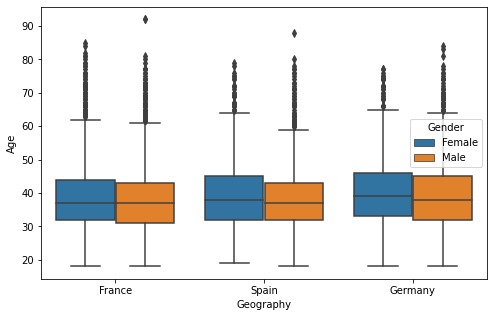

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='Geography', y='Age', hue='Gender', data=cm)

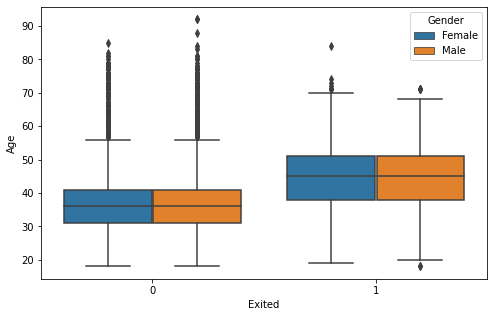

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='Exited', y='Age', hue='Gender', data=cm)

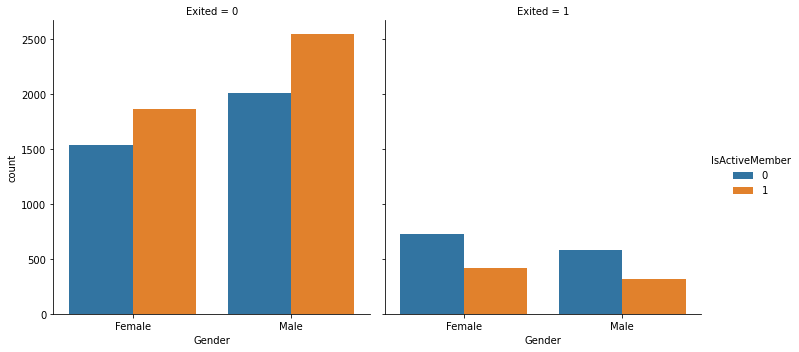

In [ ]:
sns.catplot(data=cm,col = "Exited",x = "Gender", hue="IsActiveMember",kind = "count")

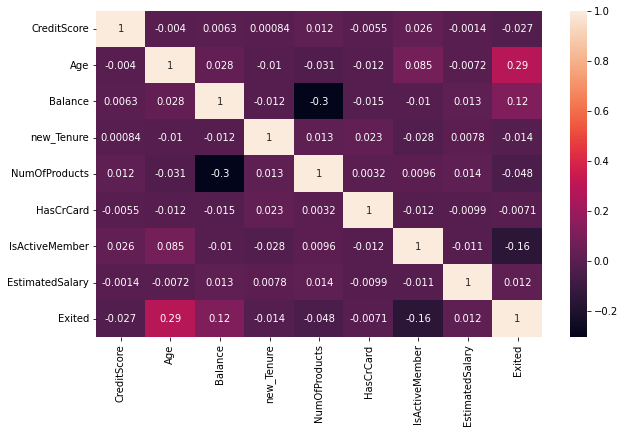

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
corr = cm.corr()
sns.heatmap(corr,annot=True)

In [ ]:
cm

,Surname,CreditScore,Geography,Gender,Age,Balance,new_Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,0.00,2,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,83807.86,1,1,0,1,112542.58,0
3,Onio,502,France,Female,42,159660.80,8,3,1,0,113931.57,1
4,Boni,699,France,Female,39,0.00,1,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,125510.82,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Obijiaku,771,France,Male,39,0.00,5,2,1,0,96270.64,0
9997,Johnstone,516,France,Male,35,57369.61,10,1,1,1,101699.77,0
9998,Liu,709,France,Female,36,0.00,7,1,0,1,42085.58,1


In [ ]:
cm_new = cm.iloc[:,[1,4,5,6,7,8,9,10,11]]
cm_new

,CreditScore,Age,Balance,new_Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,
1,619,42,0.00,2,1,1,1,101348.88,1
2,608,41,83807.86,1,1,0,1,112542.58,0
3,502,42,159660.80,8,3,1,0,113931.57,1
4,699,39,0.00,1,2,0,0,93826.63,0
5,850,43,125510.82,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9996,771,39,0.00,5,2,1,0,96270.64,0
9997,516,35,57369.61,10,1,1,1,101699.77,0
9998,709,36,0.00,7,1,0,1,42085.58,1


In [ ]:
cm_newn = cm_new.iloc[:,[0,1,2,7,8]]
cm_newn
cm_new = cm_newn

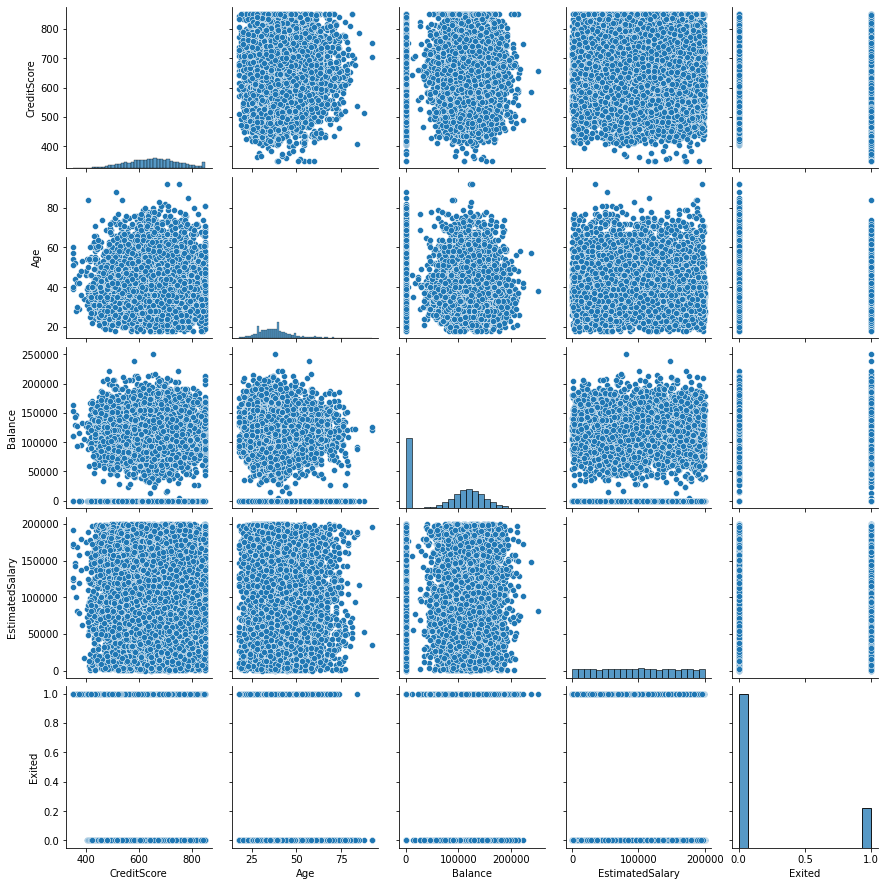

In [ ]:
sns.pairplot(cm_newn)

# Descriptive Satistics & Handling Null Values

In [7]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
cm.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cm.duplicated().sum()

0

In [ ]:
cm.isnull().any()

Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Balance            False
new_Tenure         False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

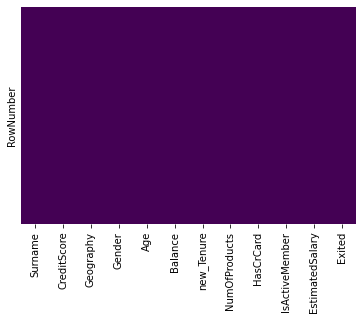

In [ ]:
sns.heatmap(cm.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [5]:
cm["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


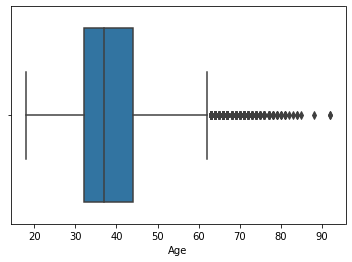

In [12]:
sns.boxplot(cm.Age)

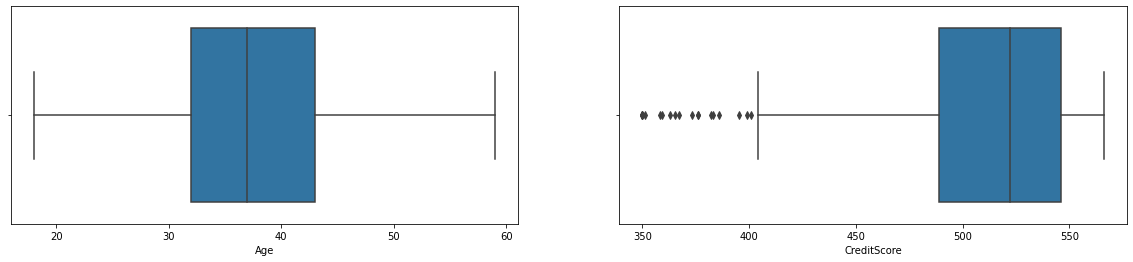

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (20,4))
sns.boxplot(x="Age",data=cm,ax=ax1)
sns.boxplot(x="CreditScore",data=cm,ax=ax2)

# Outlier Removal using IQR

In [30]:
a1=cm.Age.quantile(0.25)
a2=cm.Age.quantile(0.75)

In [31]:
IQR=a2-a1

In [32]:
upper_limit = a2 + 1.5 * IQR
lower_limit = a1- 1.5 * IQR

In [33]:
upper_limit

59.5

In [35]:
cm=cm[cm.Age < upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


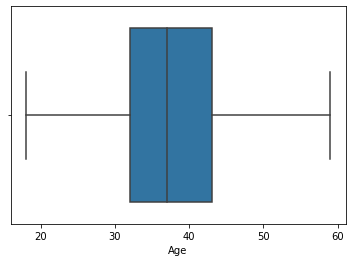

In [43]:
sns.boxplot(cm.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


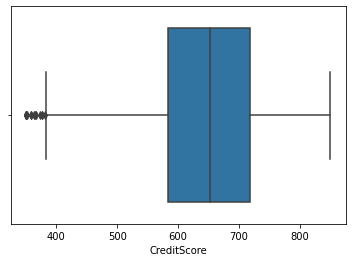

In [47]:
sns.boxplot(cm.CreditScore)

In [48]:
b1=cm.CreditScore.quantile(0.25)
b2=cm.CreditScore.quantile(0.75)

In [49]:
IQR_CrSc = b2-b1

In [51]:
upper_limit = b2 + 1.5 * IQR_CrSc
lower_limit = b1 - 1.5 * IQR_CrSc

In [52]:
lower_limit

383.0

In [53]:
cm = cm[cm.CreditScore > lower_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


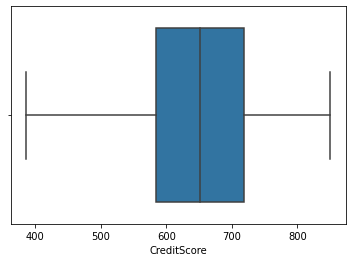

In [54]:
sns.boxplot(cm.CreditScore)

# Outlier Removal using Percentile

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


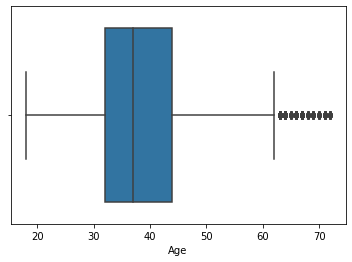

In [70]:
sns.boxplot(cm.Age)

In [80]:
p99 = cm.Age.quantile(0.99)
p99

72.0

In [81]:
cm.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [82]:
cm = cm[cm.Age <= p99]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


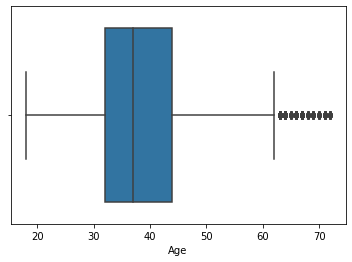

In [83]:
sns.boxplot(cm.Age)

In [ ]:
d

# Outlier Removal using ZScore

In [99]:
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


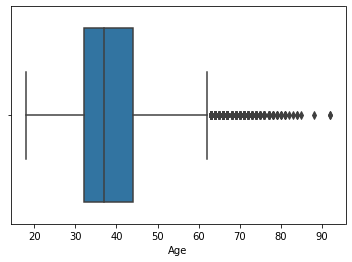

In [100]:
sns.boxplot(cm.Age)

In [101]:
Age_zscore=stats.zscore(cm.Age)
Age_zscore

0       0.293517
1       0.198164
2       0.293517
3       0.007457
4       0.388871
          ...   
9995    0.007457
9996   -0.373958
9997   -0.278604
9998    0.293517
9999   -1.041433
Name: Age, Length: 10000, dtype: float64

In [102]:
cm_z = cm[np.abs(Age_zscore)<=3]

In [96]:
cm_z.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


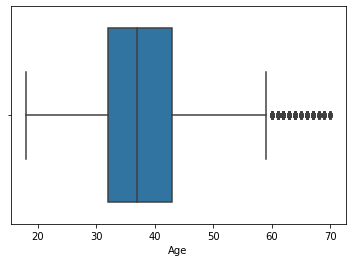

In [103]:
sns.boxplot(cm_z.Age)

# Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le = LabelEncoder()

In [106]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
cm.Gender = le.fit_transform(cm.Gender)

In [110]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [111]:
cm_first = pd.get_dummies(cm,columns=["Geography"])
cm_first.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Split Data into Dependant and Independent Variables

In [112]:
y = cm_first['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [117]:
X = cm_first.drop(columns=['Exited','Surname'],axis=1)
X.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


# Scaling the Independant Variables

In [114]:
from sklearn.preprocessing import scale

In [118]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-1.731878,-0.783213,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809
1,-1.731531,-0.606534,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740
2,-1.731185,-0.995885,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809
3,-1.730838,0.144767,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809
4,-1.730492,0.652659,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740


# Train Test Split

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [121]:
X_train.shape

(7000, 14)

In [122]:
X_test.shape

(3000, 14)

In [124]:
y_train.shape

(7000,)

In [125]:
y_test.shape

(3000,)